In [1]:
import pandas
import numpy as np

In [2]:
df = pandas.read_csv('dataset/marketing_campaign.csv', sep=';')
df.shape

(2240, 29)

In [3]:
# print(df.describe())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
print(df.Z_CostContact.describe())
print(df.Z_Revenue.describe())

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64
count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64


'Z_CostContact' and 'Z_Revenue' seem to be constants which won't affect our analysis or algorithms, so we can drop these columns.

In [6]:
df = df.drop(['Z_Revenue', 'Z_CostContact'], axis=1)

In [7]:
df['Minorhome'] = df.Kidhome + df.Teenhome
df = df.drop(['Kidhome', 'Teenhome'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [32]:
df.corr()['Response'].sort_values(ascending=False)

Response             1.000000
AcceptedCmp5         0.324891
AcceptedCmp1         0.297212
TotalSpend           0.264443
AcceptedCmp3         0.253849
Wines                0.246320
Meat                 0.237966
Catalog              0.219912
AcceptedCmp4         0.180032
AcceptedCmp2         0.169234
Income               0.161387
Web                  0.151084
Gold                 0.141096
Fruits               0.123007
Sweet                0.116059
Fish                 0.108135
Store                0.035563
Discount             0.003226
Complain            -0.000145
NumWebVisitsMonth   -0.002625
ID                  -0.021112
Age                 -0.030926
Minorhome           -0.167937
Recency             -0.200114
Name: Response, dtype: float64

In [9]:
df.Dt_Customer.describe()

count           2240
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

In [10]:
year = df.Dt_Customer.str.extract(r'(\d{4})', expand=False)
df.Dt_Customer = pandas.to_numeric(year)
print(df.Dt_Customer.head())

0    2012
1    2014
2    2013
3    2014
4    2014
Name: Dt_Customer, dtype: int64


In [11]:
df['Age'] = df.Dt_Customer - df.Year_Birth
df = df.drop(['Dt_Customer', 'Year_Birth'], axis=1)
print(df['Age'].head())

0    55
1    60
2    48
3    30
4    33
Name: Age, dtype: int64


In [12]:
df.Age.describe()

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

In [13]:
df.Age.sort_values(ascending=False)

239     121
339     114
192     113
1950     73
424      72
       ... 
914      18
1163     18
2213     17
1850     17
46       16
Name: Age, Length: 2240, dtype: int64

In [14]:
df = df[df['Age'] < 100]

In [15]:
# print(df.loc[307:, ['Marital_Status', 'Income']].head(6))

In [16]:
# from collections import Counter
# print(Counter(df['Education']))

In [17]:
# %timeit -n 10000 df.Education.value_counts()
# %timeit -n 10000 Counter(df['Education'])

In [18]:
df.Education.value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [19]:
df.Income.sort_values(ascending=False)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
          ...   
2078         NaN
2079         NaN
2081         NaN
2084         NaN
2228         NaN
Name: Income, Length: 2237, dtype: float64

In [20]:
df.Income.describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

There seems to be a single high outlier for the income field. We can safely remove it due to the singularity.

In [21]:
df = df.dropna(subset=['Income'])
df = df[df['Income'] < 200000]

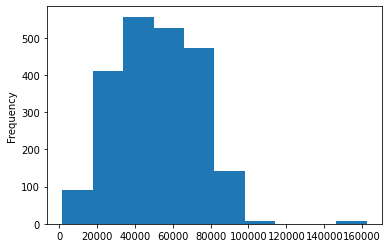

In [22]:
import matplotlib.pyplot as plt
df.Income.plot(kind = 'hist')
plt.show()

In [23]:
df.Marital_Status.value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
mstatus_dict = {'Married':'Coupled', 'Together':'Coupled', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single', 'YOLO':'Single', 'Absurd':'Single'}
df['Marital_Status'] = df['Marital_Status'].replace(mstatus_dict)

In [25]:
df['Marital_Status'].value_counts()

Coupled    1428
Single      784
Name: Marital_Status, dtype: int64

In [26]:
rename_cols_dict = {'Marital_Status': 'Rel_Status', 'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalog', 'NumStorePurchases': 'Store', 'NumDealsPurchases': 'Discount',
                    'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweet', 'MntGoldProds': 'Gold'}
df = df.rename(columns=rename_cols_dict)

In [27]:
df['TotalSpend'] = df.Wines + df.Fruits + df.Meat + df.Fish + df.Sweet + df.Gold

In [28]:
df.columns

Index(['ID', 'Education', 'Rel_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet', 'Gold', 'Discount', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Minorhome',
       'Age', 'TotalSpend'],
      dtype='object')

Will use AutoViz / Plotly Express for visualizations...

In [29]:
cluster_dataset = df[['Age', 'Education', 'Rel_Status', 'Income', 'TotalSpend', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']]

In [30]:
cluster_dataset.head()

,Age,Education,Rel_Status,Income,TotalSpend,Wines,Fruits,Meat,Fish,Sweet,Gold
0,55,Graduation,Single,58138.0,1617,635,88,546,172,88,88
1,60,Graduation,Single,46344.0,27,11,1,6,2,1,6
2,48,Graduation,Coupled,71613.0,776,426,49,127,111,21,42
3,30,Graduation,Coupled,26646.0,53,11,4,20,10,3,5
4,33,PhD,Coupled,58293.0,422,173,43,118,46,27,15


In [31]:
cluster_dataset.to_csv('dataset/cluster_dataset.csv', index=False)

To be continued...